In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [56]:
df = pd.read_csv("C:/AI_study/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [57]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Features
- Pregnacies : 임신 횟수
- Glucose: 혈당 수치
- BloodPressure: 혈압 (mm Hg)
- SkinThickness: 피부 두께 (mm)
- Insulin: 인슐린 수치 (mu U/ml)
- BMI (Body Mass Index): 체질량 지수
- DiabetesPedigreeFunction: 당뇨병 유전력 함수
- Age: 나이
- Outcome: 당뇨병 여부 (0 or 1) - label


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [59]:
# 데이터 결측치 확인
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [60]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25608\4103535089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])


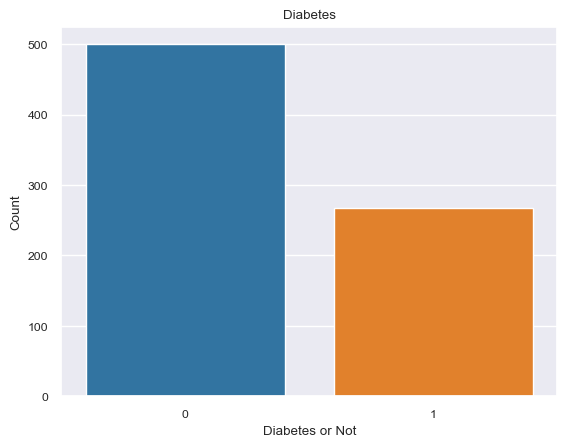

In [61]:
# Outcome 개수 시각화
sns.countplot(data = df, x="Outcome", palette=["#1f77b4", "#ff7f0e"])
plt.xlabel("Diabetes or Not")
plt.ylabel("Count")
plt.title("Diabetes")

plt.show()

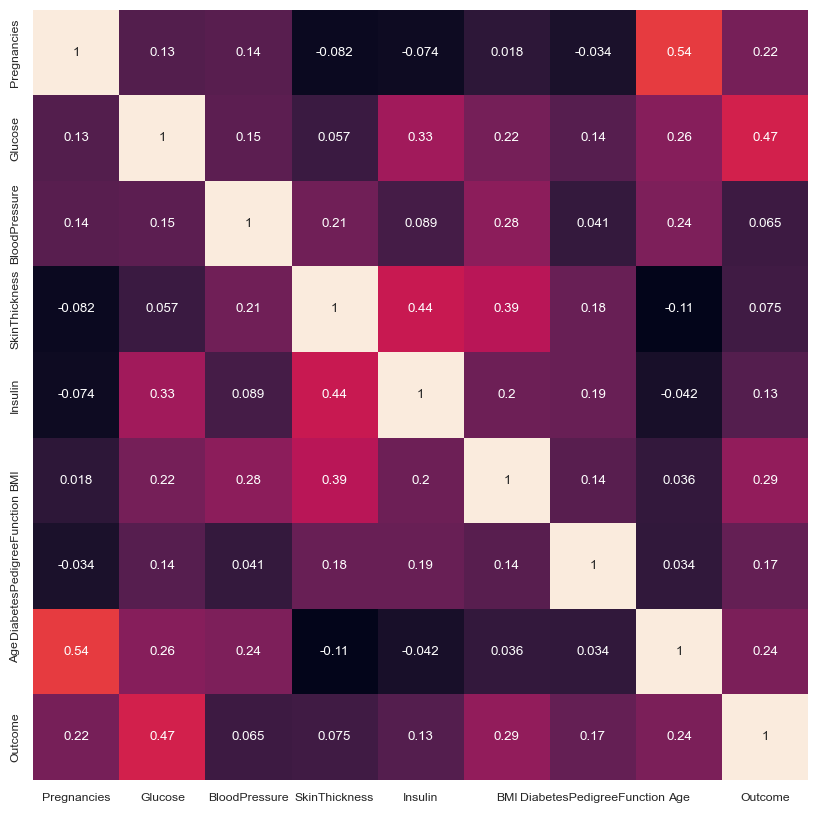

In [62]:
#상관관계 히트맵 생성
#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

## Class인 Outcome과 높은 상관 관계를 맺는 features
- Pregnancies(0.22)
- Glucose(0.47)
- BMI(0.29)
- Age(0.24)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

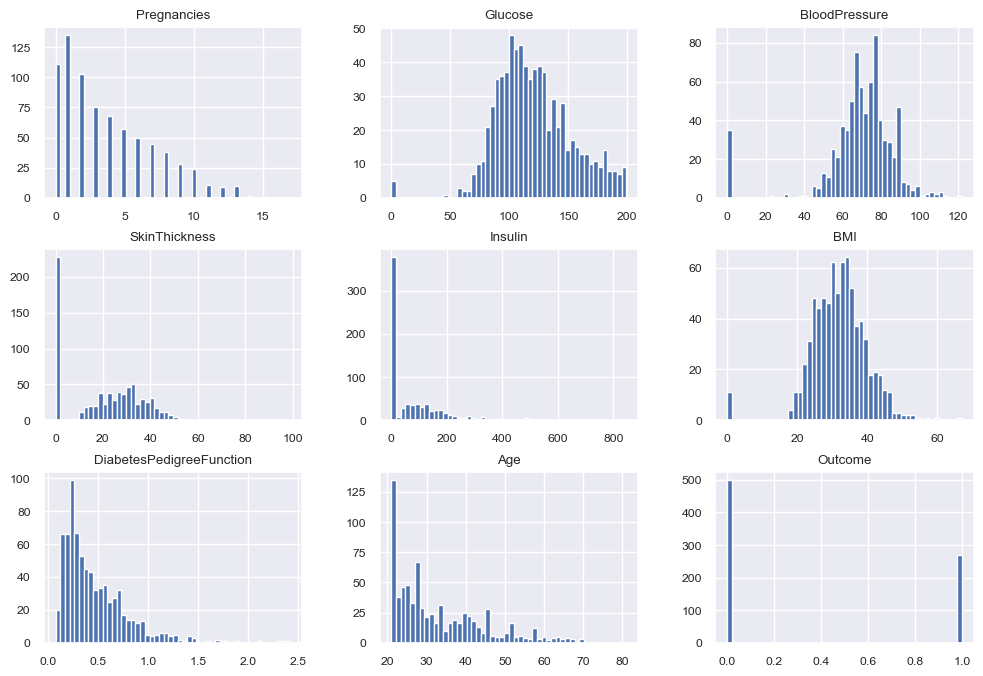

In [63]:
df.hist(bins=50, figsize=(12, 8))

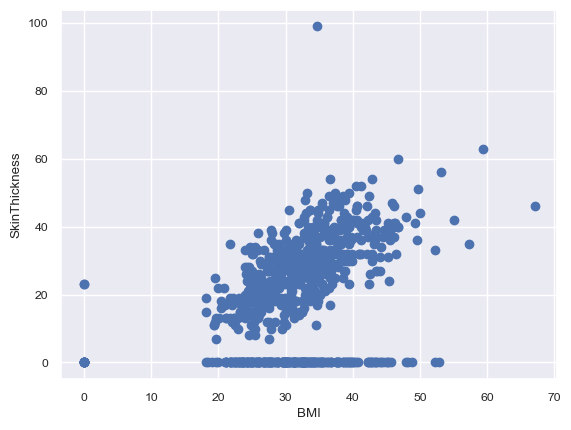

In [64]:
# BMI와 SkinThickness 관계
plt.scatter(df['BMI'], df['SkinThickness'])
plt.xlabel('BMI')
plt.ylabel('SkinThickness')

plt.show()

In [65]:
# 각 열에서 0인 값의 개수를 확인
zero_values_count = (df == 0).sum()

# 결과 출력
print(zero_values_count)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


#### Glucose(혈당 수치), BloodPressure(혈압), SkinThickness(피부 두께), Insulin(인슐린 수치), BMI(체질량 지수)가 0 값이 나오는 것은 이상치로 판단

In [66]:
# 이상치의 개수가 적은 Glucose, BloodPressure, BMI의 경우 이상치 제거
print("제거 전 데이터 개수: ", len(df))
df = df[(df['Glucose'] != 0) & 
        (df['BloodPressure'] != 0) & 
        (df['BMI'] != 0)]
print("제거 후 데이터 개수: ", len(df))

제거 전 데이터 개수:  768
제거 후 데이터 개수:  724


42개의 데이터 제거

Skin Thickness, BMI의 경우 이상치를 가진 데이터가 많고, 이상치를 제외하면 정규 분포를 따르기 때문에 평균값으로 대체

In [67]:
# 평균에 0인 값이 포함되면 평균치가 달라지므로 0인 값을 NaN으로 대체한 후 평균 계산후 대체
# SkinThickness와 Insulin의 0을 NaN으로 변경
df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)

# SkinThickness와 Insulin의 NaN 값을 평균값으로 대체
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25608\71297009.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['SkinThickness', 'Insulin']] = df[['SkinThickness', 'Insulin']].replace(0, np.nan)
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25608\71297009.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
C:\Users\yc_hur\AppData\Local\Temp\ipykernel_25608\71297009.py:7: SettingWithCopyWarning: 
A value is trying to be set on a 

In [68]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.182331,156.056122,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.018907,87.395294,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,118.250000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.182331,156.056122,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,156.056122,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

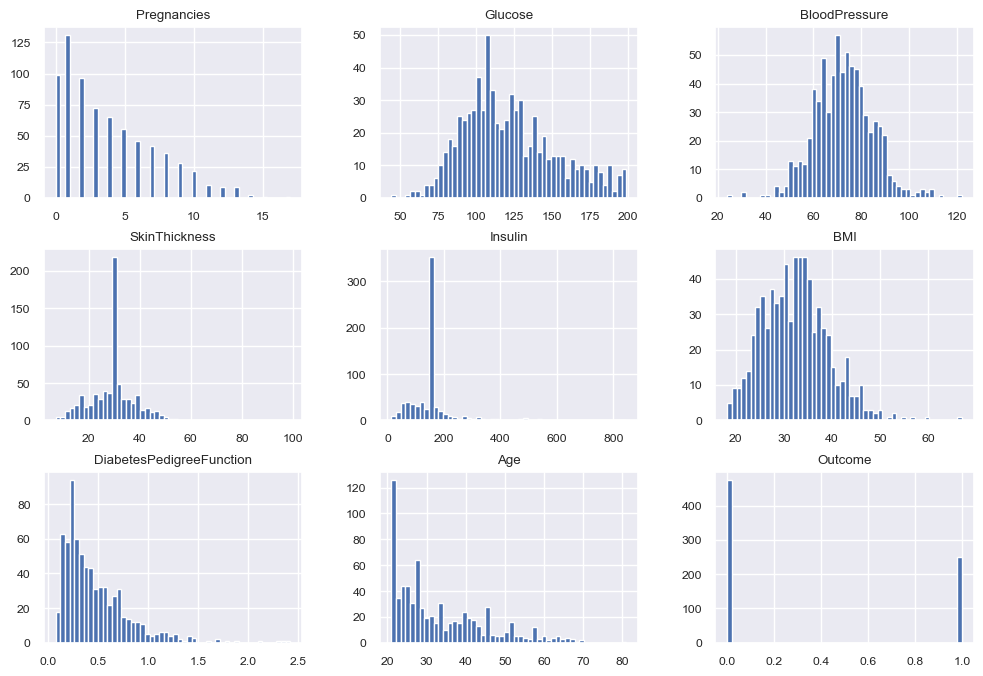

In [69]:
df.hist(bins=50, figsize=(12, 8))

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(df.drop('Outcome', axis=1), df['Outcome'])

In [71]:
y_resampled.value_counts()

Outcome
1    475
0    475
Name: count, dtype: int64

In [72]:
# 두 데이터를 합치기
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# 결과 출력
print(df_resampled)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0              6      148             72      35.000000  156.056122   
1              1       85             66      29.000000  156.056122   
2              8      183             64      29.182331  156.056122   
3              1       89             66      23.000000   94.000000   
4              0      137             40      35.000000  168.000000   
..           ...      ...            ...            ...         ...   
945            8      111             81      32.699471  175.860887   
946            3      141             82      44.280559   90.624447   
947            5       98             76      27.453858  156.056122   
948            7      180             67      35.516504  493.825795   
949            1      146             94      40.695674  156.056122   

           BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.600000                  0.627000   50        1  
1    26.600000                  0

In [73]:
df_resampled['Outcome'].value_counts()

Outcome
1    475
0    475
Name: count, dtype: int64

In [74]:
import numpy as np
from collections import Counter

# split_sequence 함수 (수정됨)
def split_sequence(sequence, labels, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        
        # sequence에서 n_steps 크기만큼 데이터 추출
        seq_x = sequence[i:end_ix]
        
        # labels에서 n_steps 크기만큼 레이블 추출
        seq_y = labels[i:end_ix]
        
        # seq_y에서 가장 많이 등장한 레이블 선택
        most_common_label = Counter(seq_y).most_common(1)[0][0]
        
        # X와 y에 추가
        X.append(seq_x)
        y.append(most_common_label)
    
    return np.array(X), np.array(y)

In [75]:
# 실제 데이터 적용
sequence = df_resampled.drop('Outcome', axis=1).values  # 수치형 데이터
labels = df_resampled['Outcome'].values  # 범주형 레이블 'Rings_binned'

# 시퀀스 분리
n_steps = 10
X, y = split_sequence(sequence, labels, n_steps)

In [76]:
print(X)
print(y)

[[[6.00000000e+00 1.48000000e+02 7.20000000e+01 ... 3.36000000e+01
   6.27000000e-01 5.00000000e+01]
  [1.00000000e+00 8.50000000e+01 6.60000000e+01 ... 2.66000000e+01
   3.51000000e-01 3.10000000e+01]
  [8.00000000e+00 1.83000000e+02 6.40000000e+01 ... 2.33000000e+01
   6.72000000e-01 3.20000000e+01]
  ...
  [2.00000000e+00 1.97000000e+02 7.00000000e+01 ... 3.05000000e+01
   1.58000000e-01 5.30000000e+01]
  [4.00000000e+00 1.10000000e+02 9.20000000e+01 ... 3.76000000e+01
   1.91000000e-01 3.00000000e+01]
  [1.00000000e+01 1.68000000e+02 7.40000000e+01 ... 3.80000000e+01
   5.37000000e-01 3.40000000e+01]]

 [[1.00000000e+00 8.50000000e+01 6.60000000e+01 ... 2.66000000e+01
   3.51000000e-01 3.10000000e+01]
  [8.00000000e+00 1.83000000e+02 6.40000000e+01 ... 2.33000000e+01
   6.72000000e-01 3.20000000e+01]
  [1.00000000e+00 8.90000000e+01 6.60000000e+01 ... 2.81000000e+01
   1.67000000e-01 2.10000000e+01]
  ...
  [4.00000000e+00 1.10000000e+02 9.20000000e+01 ... 3.76000000e+01
   1.91000

In [77]:
# 고유한 값과 그 빈도를 계산
unique, counts = np.unique(y, return_counts=True)

# 고유한 값과 빈도 출력
print(dict(zip(unique, counts)))

{0: 590, 1: 350}


In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=32)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((601, 10, 8), (188, 10, 8), (601,), (188,))

## DL Model (CNN)
- Outcome은 0과 1로 구성되어 있으므로 따로 One-hot encoding 진행 X
- 2진 분류의 문제이므로 Output은 1개의 뉴런 (출력 값이 1일 확률)
- 마찬가지로 2진 분류이므로 activation 함수는 sigmoid, loss function은 binary_crossentropy 사용

In [79]:
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
print(n_timesteps, n_features)

10 8


In [80]:
# from tensorflow.keras.layers import Dense, Flatten, Conv1D
# from tensorflow.keras.models import Sequential

# # Sequential model type
# model = Sequential()
# model.add(Conv1D(filters=6, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
# model.add(Conv1D(filters=9, kernel_size=3, activation='relu'))
# model.add(Flatten())
# model.add(Dense(9, activation='relu'))
# model.add(Dense(2, activation='softmax'))
# model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [81]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

# Sequential model type
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Conv1D(filters=16, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [82]:
batch_size = 128
train_epochs = 100

history = model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100
5/5 [==============================] - 1s 74ms/step - loss: 0.7940 - accuracy: 0.4659 - val_loss: 1.9124 - val_accuracy: 0.3709
Epoch 2/100
5/5 [==============================] - 0s 16ms/step - loss: 0.7365 - accuracy: 0.5657 - val_loss: 2.1026 - val_accuracy: 0.3709
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.7101 - accuracy: 0.5757 - val_loss: 2.2395 - val_accuracy: 0.3709
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6641 - accuracy: 0.6106 - val_loss: 2.3253 - val_accuracy: 0.3709
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.6318 - accuracy: 0.6772 - val_loss: 2.3481 - val_accuracy: 0.3709
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.5892 - accuracy: 0.7238 - val_loss: 2.3179 - val_accuracy: 0.3709
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.5685 - accuracy: 0.7221 - val_loss: 2.3008 - val_accuracy: 0.3709
Epoch 8/100
5/5 [===

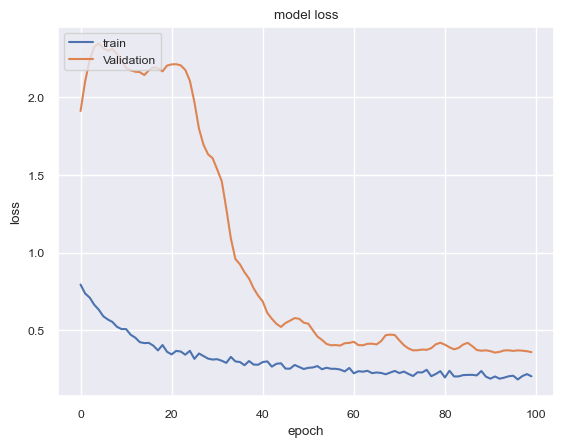

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

20 epochs 까지는 loss가 올라가다가 이후 감소하는 모습이 보임

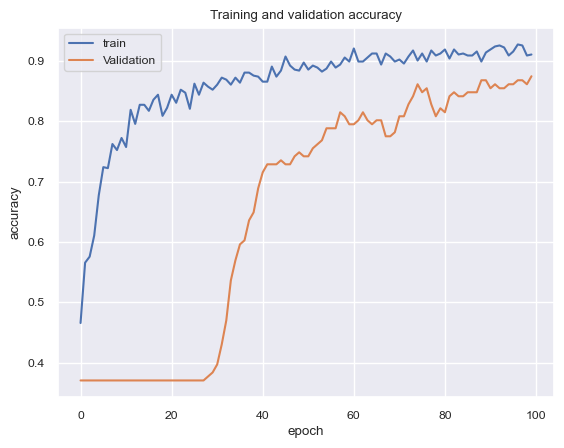

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [85]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 0s 3ms/step - loss: 0.1081 - accuracy: 0.9634


[0.10806570202112198, 0.9633943438529968]

In [86]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.8830


[0.2776537835597992, 0.8829787373542786]

6/6 [==============================] - 0s 2ms/step
[[111   7]
 [ 15  55]]
0.8829787234042553
0.881351005697012
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       118
           1       0.89      0.79      0.83        70

    accuracy                           0.88       188
   macro avg       0.88      0.86      0.87       188
weighted avg       0.88      0.88      0.88       188



<Axes: >

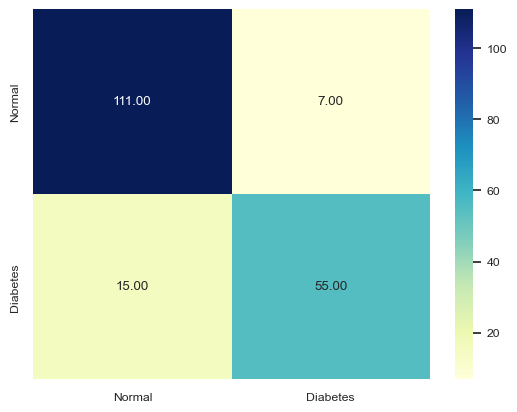

In [87]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

In [88]:
base_loss,base_accuracy=model.evaluate(X_test, y_test)

model_file='C:/AI_study/trained_model/Base_CNN_Model.h5'
  
tf.keras.models.save_model(model, model_file, include_optimizer=False)
print('model saved at ', model_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

6/6 [==============================] - 0s 2ms/step - loss: 0.2777 - accuracy: 0.8830
model saved at  C:/AI_study/trained_model/Base_CNN_Model.h5
Accuracy >88.297874
Base Loss >0.28


## Transfer Learning

In [89]:
# Base 모델을 로드 (LA_Model.h5)
from tensorflow.keras.models import load_model

base_model = load_model(model_file)

In [90]:
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
base_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2777 - accuracy: 0.8830


[0.2776537835597992, 0.8829787373542786]

In [91]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  9


In [92]:
from keras.models import clone_model, Sequential
from keras.layers import Dense

# 기존 모델을 복제
base_model_clone = clone_model(base_model)
base_model_clone.set_weights(base_model.get_weights())

# 복제된 모델의 레이어들을 Sequential로 다시 구성
new_model = Sequential()

# 기존의 LSTM과 Dense층만 추가 (마지막 출력층을 제외한 부분만 추가)
for layer in base_model_clone.layers[:-1]:  # 마지막 레이어 제거
    new_model.add(layer)

In [93]:
print("Number of layers in the base model: ", len(new_model.layers))

Number of layers in the base model:  8


In [94]:
# 기존 모델의 층을 동결 (학습되지 않도록 설정)
for layer in new_model.layers:
    layer.trainable = False

# 새로운 완전연결층 추가
new_model.add(Dense(16, activation='relu'))  # 새로운 완전 연결층 추가
new_model.add(Dense(1, activation='sigmoid'))  # 최종 출력층 추가 (19개의 클래스로 분류)

# 모델 컴파일
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

# 새 모델 요약 출력
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 32)             544       
                                                                 
 batch_normalization_2 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 9, 32)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 16)             1552      
                                                                 
 batch_normalization_3 (Batc  (None, 7, 16)            64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 7, 16)            

In [95]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_2,False
1,<keras.layers.normalization.batch_normalizatio...,batch_normalization_2,False
2,<keras.layers.regularization.dropout.Dropout o...,dropout_2,False
3,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_3,False
4,<keras.layers.normalization.batch_normalizatio...,batch_normalization_3,False
5,<keras.layers.regularization.dropout.Dropout o...,dropout_3,False
6,<keras.layers.reshaping.flatten.Flatten object...,flatten_1,False
7,<keras.layers.core.dense.Dense object at 0x000...,dense_4,False
8,<keras.layers.core.dense.Dense object at 0x000...,dense_6,True
9,<keras.layers.core.dense.Dense object at 0x000...,dense_7,True


In [96]:
batch_size = 128

train_epochs = 100
history2 = new_model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100
5/5 [==============================] - 1s 40ms/step - loss: 1.1733 - accuracy: 0.2213 - val_loss: 1.1413 - val_accuracy: 0.1656
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 1.0880 - accuracy: 0.2679 - val_loss: 1.0383 - val_accuracy: 0.1788
Epoch 3/100
5/5 [==============================] - 0s 11ms/step - loss: 0.9481 - accuracy: 0.3295 - val_loss: 0.9453 - val_accuracy: 0.2318
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8792 - accuracy: 0.3710 - val_loss: 0.8627 - val_accuracy: 0.2781
Epoch 5/100
5/5 [==============================] - 0s 10ms/step - loss: 0.7760 - accuracy: 0.4742 - val_loss: 0.7901 - val_accuracy: 0.4636
Epoch 6/100
5/5 [==============================] - 0s 11ms/step - loss: 0.6877 - accuracy: 0.5940 - val_loss: 0.7275 - val_accuracy: 0.5497
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.6531 - accuracy: 0.6456 - val_loss: 0.6733 - val_accuracy: 0.6358
Epoch 8/100
5/5 [===

In [97]:
new_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8777


[0.298734188079834, 0.8776595592498779]

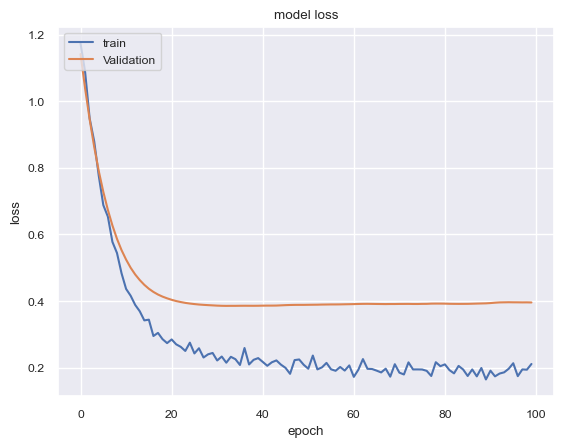

In [98]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

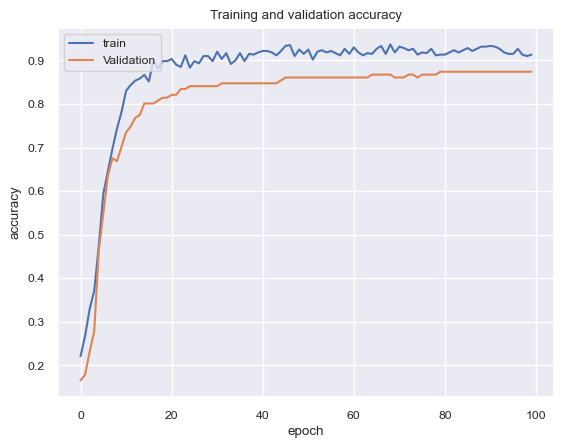

In [99]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

6/6 [==============================] - 0s 3ms/step
[[110   8]
 [ 15  55]]
0.8776595744680851
0.876202194480159
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       118
           1       0.87      0.79      0.83        70

    accuracy                           0.88       188
   macro avg       0.88      0.86      0.87       188
weighted avg       0.88      0.88      0.88       188



<Axes: >

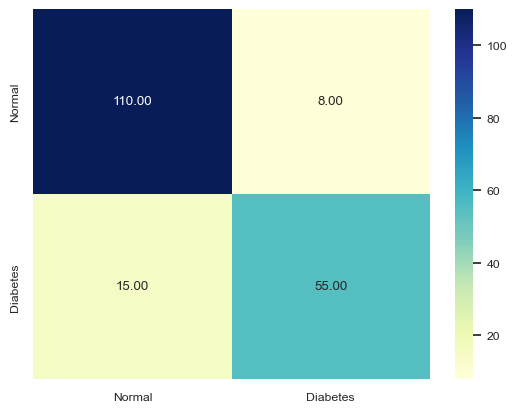

In [100]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = new_model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

## fine tuning

In [101]:
# --- 미세 조정을 위해 모델의 레이어를 학습 가능하게 설정 ---
for layer in new_model.layers:  # 각 레이어의 trainable 속성을 True로 변경
    layer.trainable = True

# 모델 재컴파일
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')

In [102]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_2,True
1,<keras.layers.normalization.batch_normalizatio...,batch_normalization_2,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout_2,True
3,<keras.layers.convolutional.conv1d.Conv1D obje...,conv1d_3,True
4,<keras.layers.normalization.batch_normalizatio...,batch_normalization_3,True
5,<keras.layers.regularization.dropout.Dropout o...,dropout_3,True
6,<keras.layers.reshaping.flatten.Flatten object...,flatten_1,True
7,<keras.layers.core.dense.Dense object at 0x000...,dense_4,True
8,<keras.layers.core.dense.Dense object at 0x000...,dense_6,True
9,<keras.layers.core.dense.Dense object at 0x000...,dense_7,True


In [103]:
batch_size = 128

train_epochs = 100
history3 = new_model.fit(X_train, y_train, epochs=train_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=True, shuffle=True)

Epoch 1/100
5/5 [==============================] - 1s 42ms/step - loss: 0.1866 - accuracy: 0.9235 - val_loss: 0.4113 - val_accuracy: 0.8675
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2044 - accuracy: 0.9085 - val_loss: 0.3866 - val_accuracy: 0.8742
Epoch 3/100
5/5 [==============================] - 0s 16ms/step - loss: 0.2105 - accuracy: 0.9201 - val_loss: 0.3707 - val_accuracy: 0.8742
Epoch 4/100
5/5 [==============================] - 0s 15ms/step - loss: 0.2086 - accuracy: 0.9301 - val_loss: 0.3615 - val_accuracy: 0.8874
Epoch 5/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1841 - accuracy: 0.9251 - val_loss: 0.3562 - val_accuracy: 0.8940
Epoch 6/100
5/5 [==============================] - 0s 14ms/step - loss: 0.2132 - accuracy: 0.9018 - val_loss: 0.3496 - val_accuracy: 0.8874
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1943 - accuracy: 0.9301 - val_loss: 0.3505 - val_accuracy: 0.8742
Epoch 8/100
5/5 [===

In [104]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 9, 32)             544       
                                                                 
 batch_normalization_2 (Batc  (None, 9, 32)            128       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 9, 32)             0         
                                                                 
 conv1d_3 (Conv1D)           (None, 7, 16)             1552      
                                                                 
 batch_normalization_3 (Batc  (None, 7, 16)            64        
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 7, 16)            

In [105]:
new_model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8723


[0.3070809245109558, 0.8723404407501221]

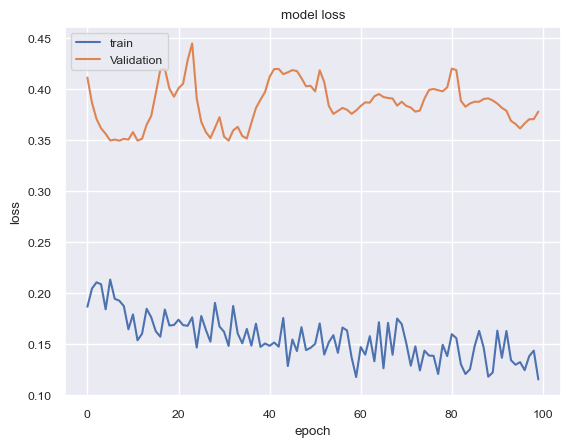

In [106]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

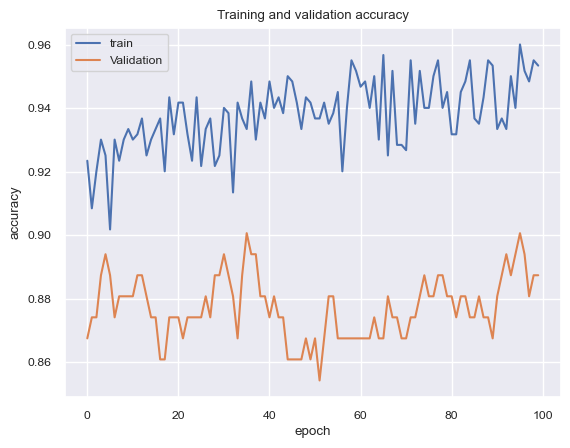

In [107]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

6/6 [==============================] - 0s 2ms/step
[[112   6]
 [ 18  52]]
0.8723404255319149
0.8694449210706932
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       118
           1       0.90      0.74      0.81        70

    accuracy                           0.87       188
   macro avg       0.88      0.85      0.86       188
weighted avg       0.87      0.87      0.87       188



<Axes: >

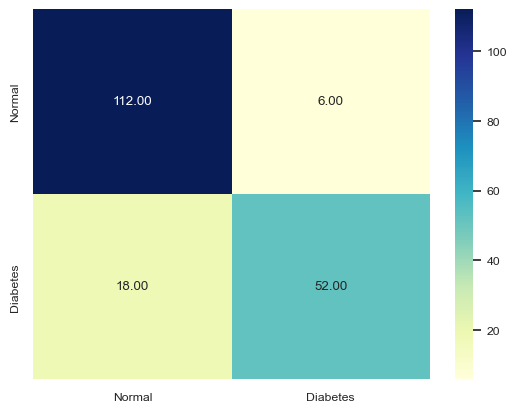

In [108]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score

# 모델이 예측한 값 (클래스 1의 확률값)
predy = new_model.predict(X_test)

# 이진 분류 문제에서는 0.5를 기준으로 0과 1로 변환
predy = (predy > 0.5).astype(int)

# Confusion Matrix와 성능 지표 출력
LABELS = ['Normal', 'Diabetes']
cm = confusion_matrix(y_test, predy)
print(cm)
print(accuracy_score(y_test, predy))
print(f1_score(y_test, predy, average='weighted'))
print(classification_report(y_test, predy))

# Confusion Matrix 시각화
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='.2f')

### F1 score(macro) 기준 
- Basemodel : 0.87
- TransferLearning : 0.87
- FineTuning : 0.86

### Base Model과 그대로 전이학습을 진행한 Model보다 Fine Tuning을 진행한 Model의 accuracy가 소폭 감소하는 모습을 볼 수 있음.
- Base Model과 전이 학습을 진행하는 New_Model의 학습을 같은 데이터 셋을 사용 하여 진행함.
- Fine Tuning이 아닌 추가한 두 개의 layer만 학습을 진행한 모델의 경우는 아래 두개의 층만 학습.
- Fine Tuning의 경우 전체 layer를 모두 학습하는데, 앞 layer들은 이미 같은 데이터 셋으로 학습을 진행 했기때문에 Overfitting의 문제가 발생할 수 있음.
- learning rate를 조절하면서 이를 해결할 수 있을 것이라 생각함.